In [1]:
import datetime
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Density dictionary

In [47]:
fn = r'C:\Users\Default\Documents\transect_densities.xlsx'
xl = pd.read_excel(fn, engine='openpyxl', sheet_name=None, parse_dates=True, index_col=0)
xl.keys()

#for values in xl.keys():
#    print(xl[values])

dict_keys(['5', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '18', '19', '20', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'])

In [48]:
for values in xl.keys():
    
    xl[values].loc['avg'] = xl[values].mean()
    xl[values].loc['stdv'] = xl[values].std()

    xl[values] = xl[values].T
    xl[values] = xl[values].resample('10D').mean()

    xl[values].reset_index(inplace=True)
    xl[values]['day'] = xl[values]['index'].dt.day
    xl[values]['month'] = xl[values]['index'].dt.month
    xl[values]['year'] = xl[values]['index'].dt.year

    xl[values] = xl[values].sort_values(by="index")
    xl[values].set_index('index', inplace=True)
    
    cols = ['month']
    xl[values][cols] = xl[values][xl[values][cols] != 5][cols]
    xl[values].dropna(inplace=True)
    
    cols = ['month']
    xl[values][cols] = xl[values][xl[values][cols] != 6][cols]
    xl[values].dropna(inplace=True)

    cols = ['month']
    xl[values][cols] = xl[values][xl[values][cols] != 7][cols]
    xl[values].dropna(inplace=True)

    cols = ['month']
    xl[values][cols] = xl[values][xl[values][cols] != 8][cols]
    xl[values].dropna(inplace=True)
    
    #print(xl[values])

# entire density dataset

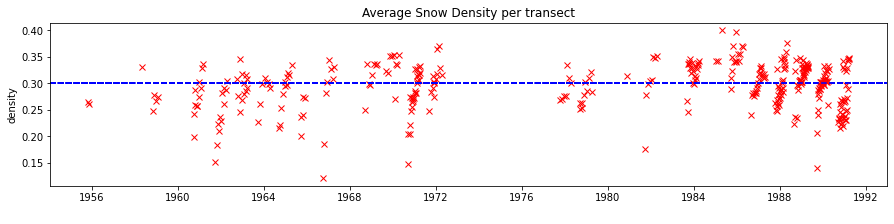

In [4]:
plt.figure(figsize=(15,3))
for values in xl.keys():
    plt.plot(xl[values].index, xl[values].avg, 'rx')
    plt.axhline(y=0.3, color='b', linestyle='--')
    plt.title('Average Snow Density per transect')
    plt.xlabel(' ')
    #plt.xticks(xl[values].month)
    plt.ylabel('density')

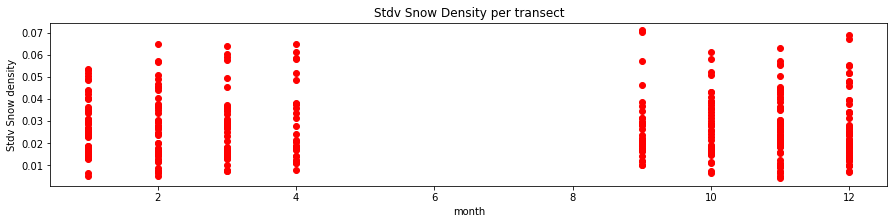

In [5]:
plt.figure(figsize=(15,3))
for values in xl.keys():
    plt.plot(xl[values].month, xl[values].stdv, 'ro')
    plt.title('Stdv Snow Density per transect')
    plt.xlabel('month')
    #plt.xticks(xl[values].month)
    plt.ylabel('Stdv Snow density')

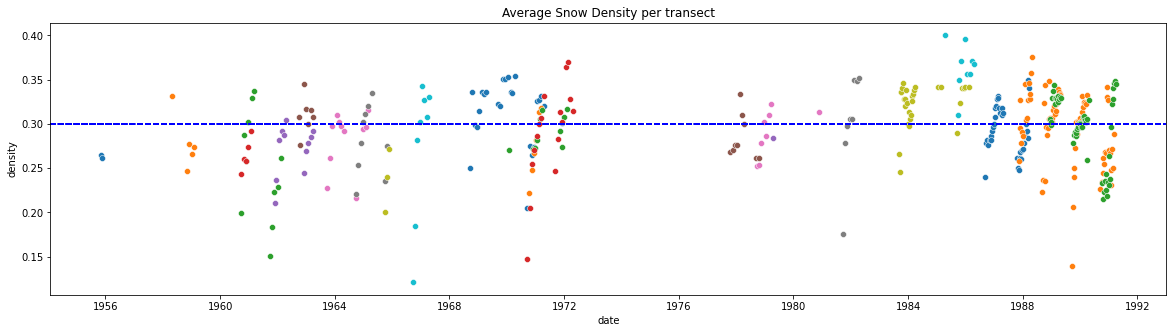

In [6]:
plt.figure(figsize=(20,5))
for values in xl.keys():
    sns.scatterplot(x = xl[values].index, y= xl[values].avg, data=xl[values]);
    plt.axhline(y=0.3, color='b', linestyle='--');
    plt.title('Average Snow Density per transect');
    plt.xlabel('date');
    plt.ylabel('density');

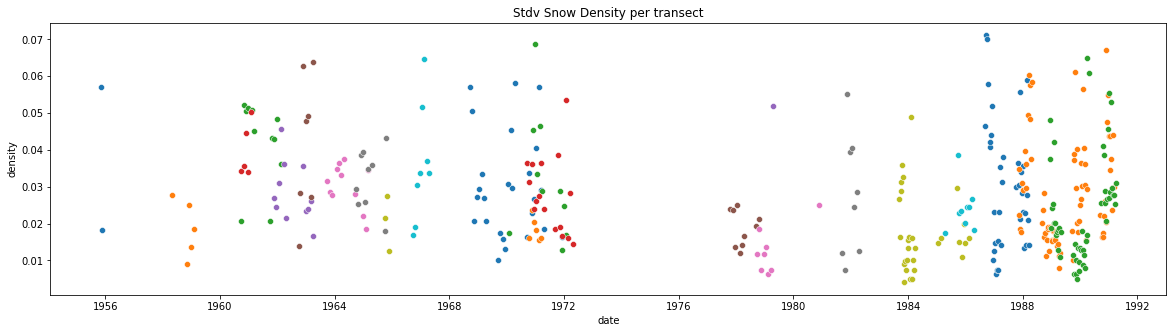

In [7]:
plt.figure(figsize=(20,5))
for values in xl.keys():
    sns.scatterplot(x= xl[values].index, y= xl[values].stdv, data=xl[values])
    plt.title('Stdv Snow Density per transect')
    plt.xlabel('date')
    plt.ylabel('density')

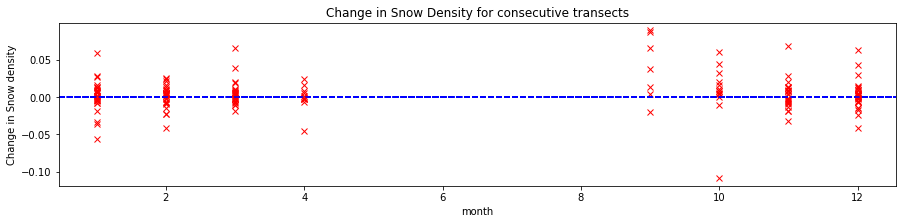

In [8]:
plt.figure(figsize=(15,3))
for values in xl.keys():
    plt.plot(xl[values].month, xl[values].avg.diff(), 'rx')
    plt.axhline(y=0, color='b', linestyle='--')
    plt.title('Change in Snow Density for consecutive transects')
    plt.xlabel('month')
    #plt.xticks(xl[values].month)
    plt.ylabel('Change in Snow density')

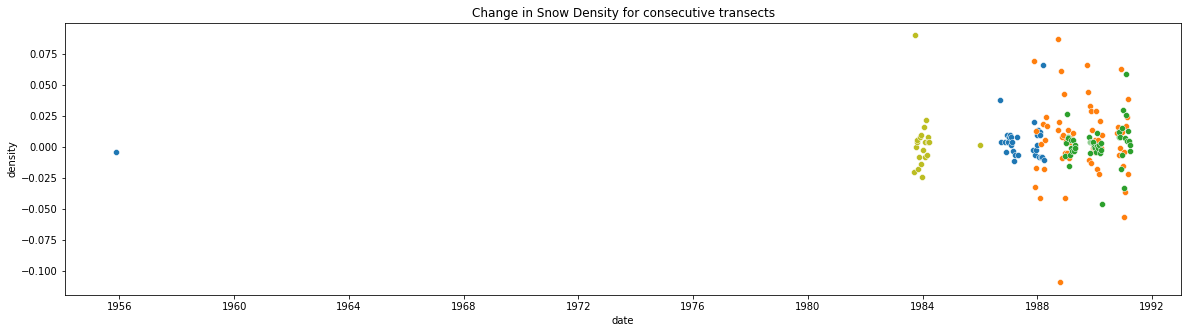

In [9]:
plt.figure(figsize=(20,5))
for values in xl.keys():
    sns.scatterplot(x= xl[values].index, y= xl[values].avg.diff(), data=xl[values])
    plt.title('Change in Snow Density for consecutive transects')
    plt.xlabel('date')
    plt.ylabel('density')

# density differneces

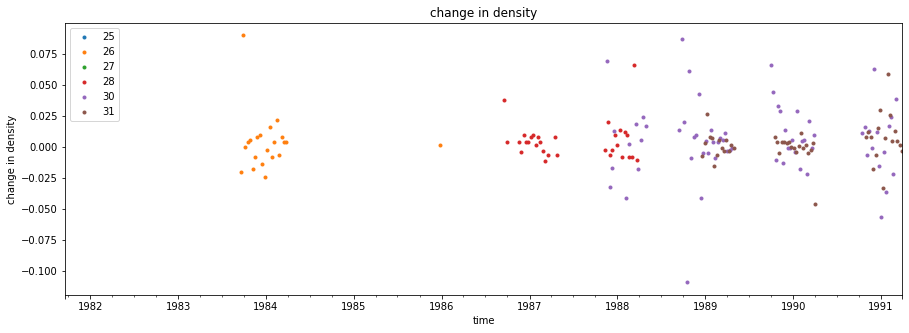

In [10]:
i = (['25', '26', '27', '28', '30', '31'])
for values in i:
    xl[values].avg.diff().plot(figsize=(15,5),style='.')
    plt.title('change in density')
    plt.xlabel('time')
    plt.ylabel('change in density')
    plt.legend(i)

# density boxplots

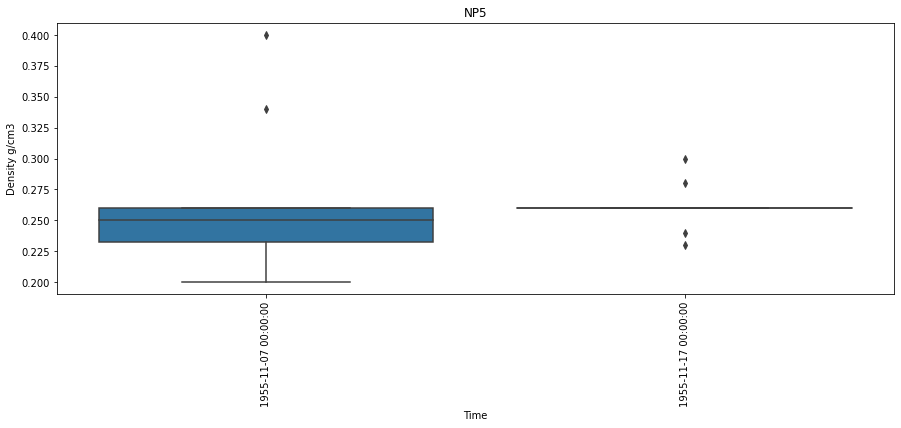

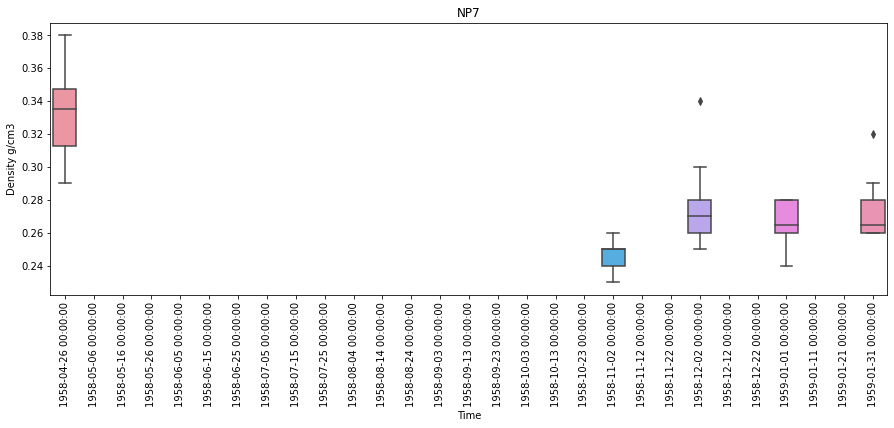

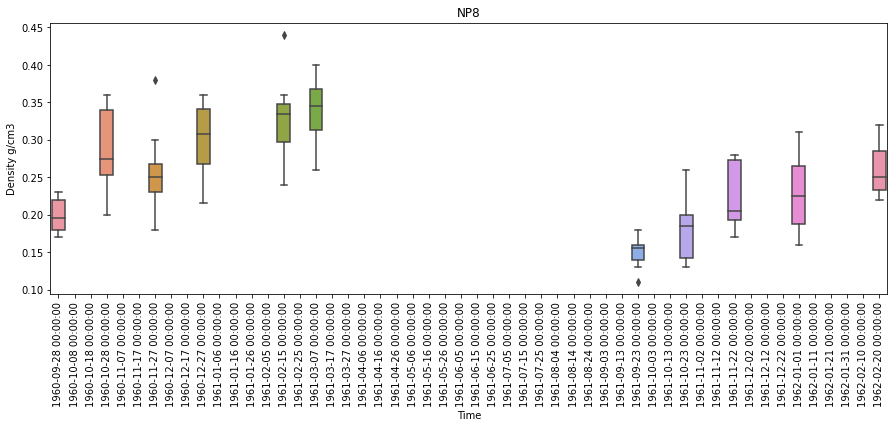

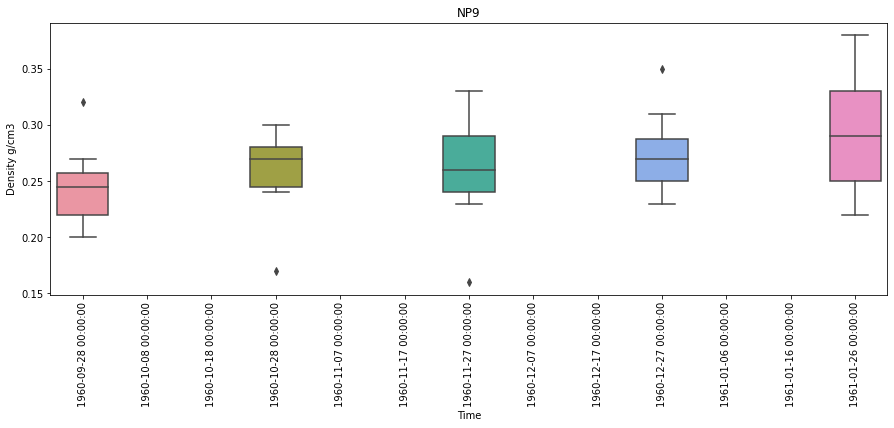

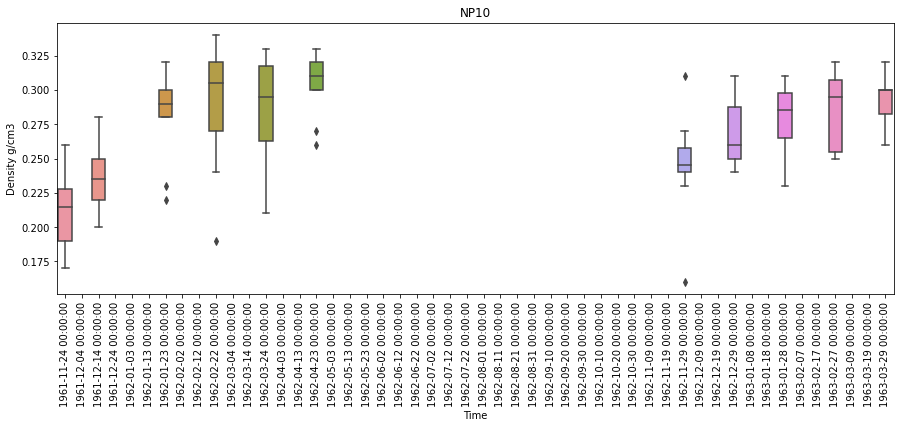

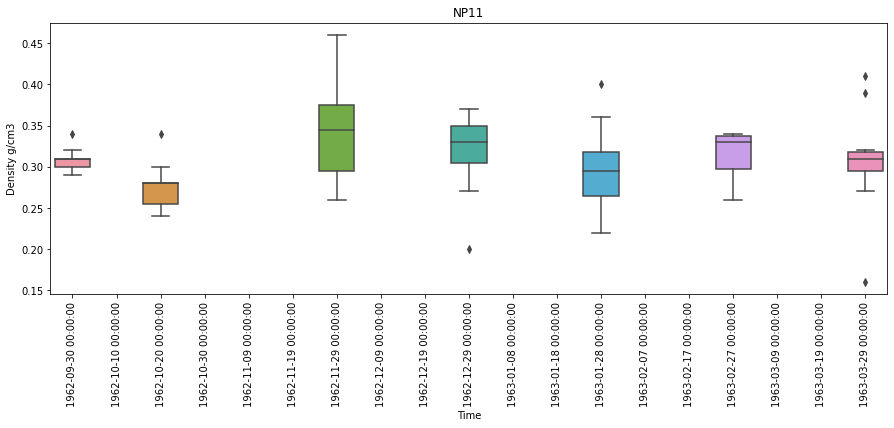

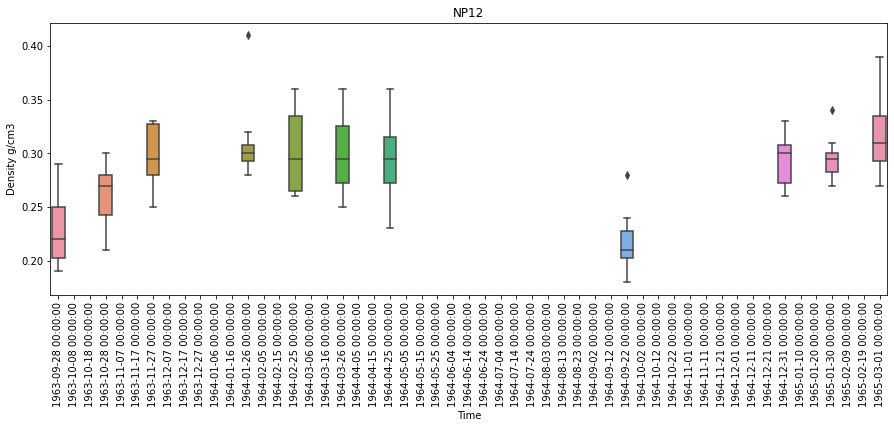

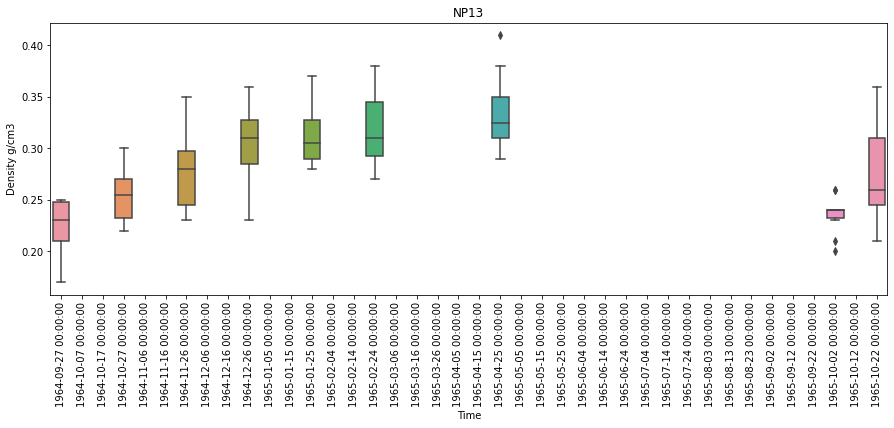

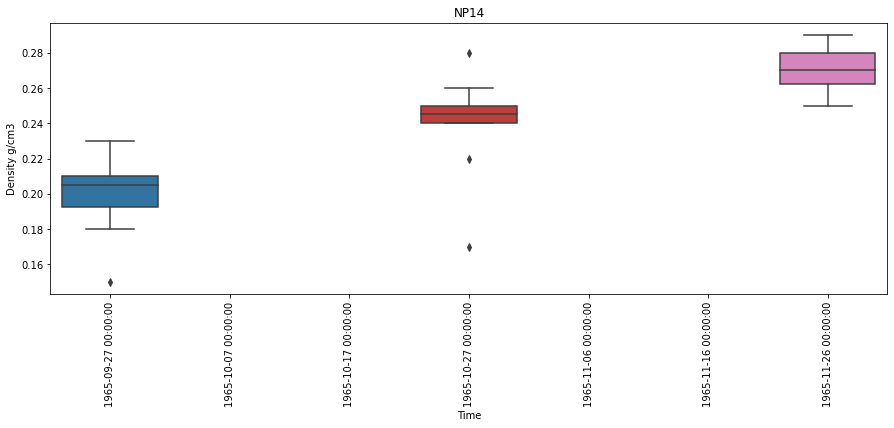

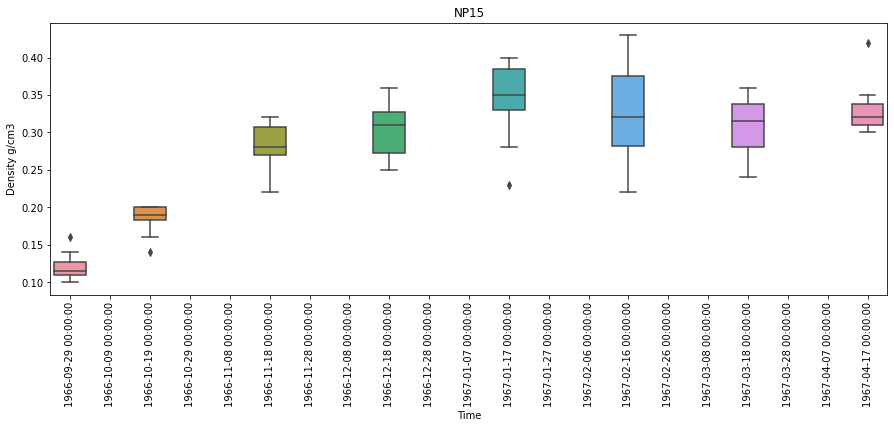

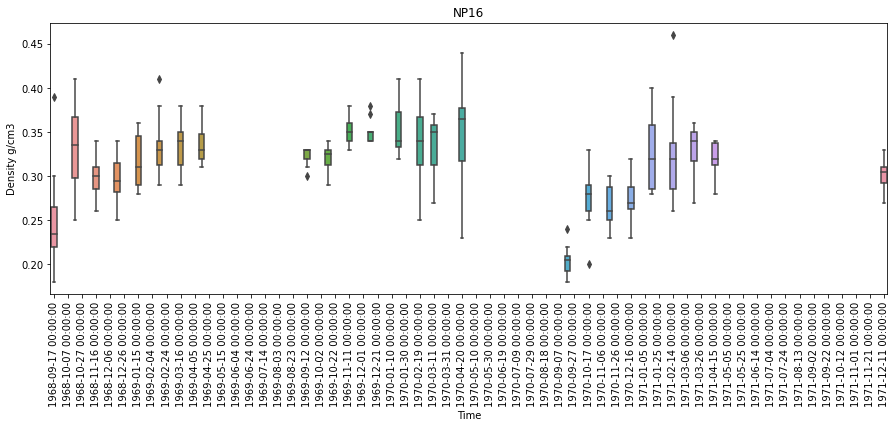

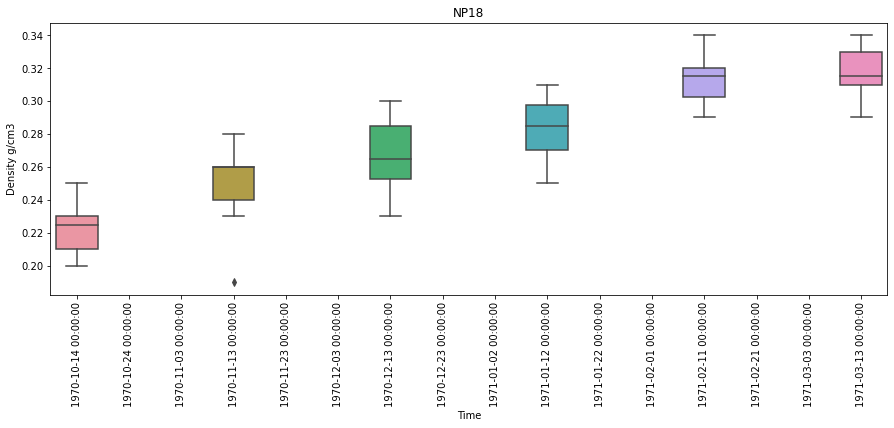

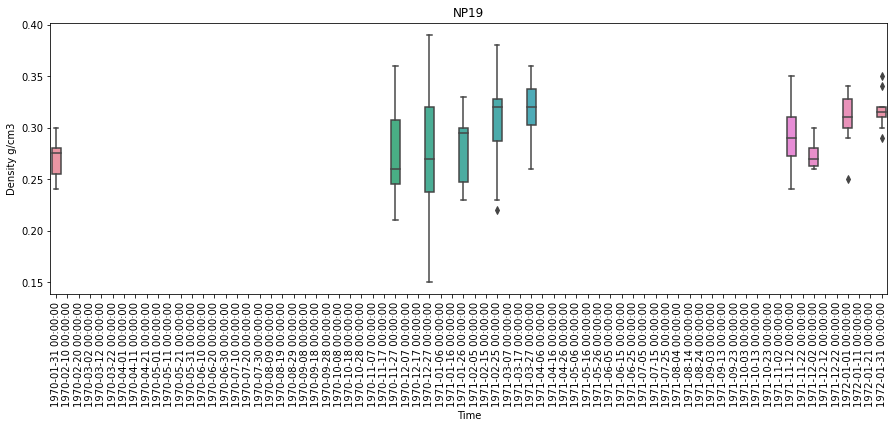

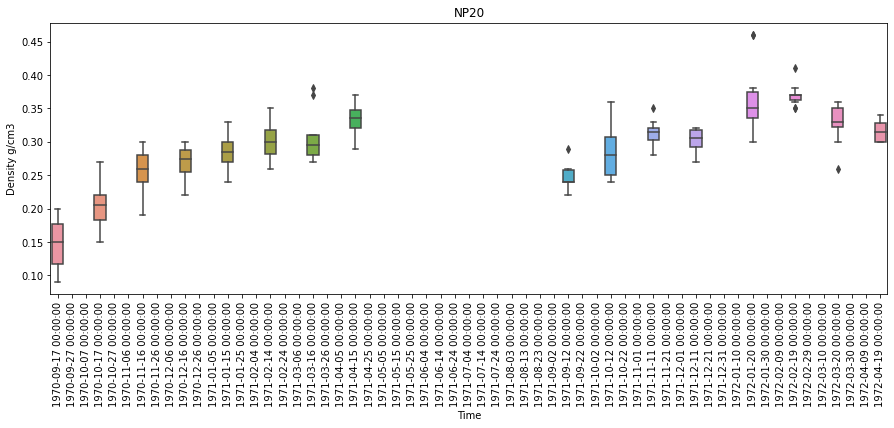

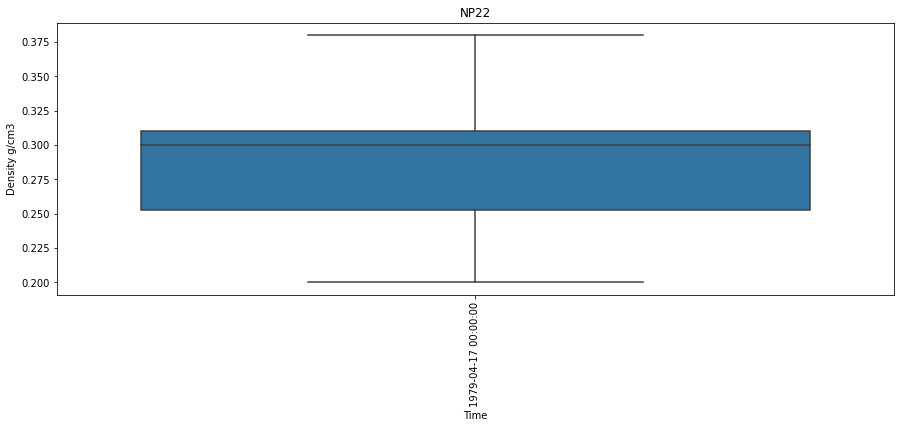

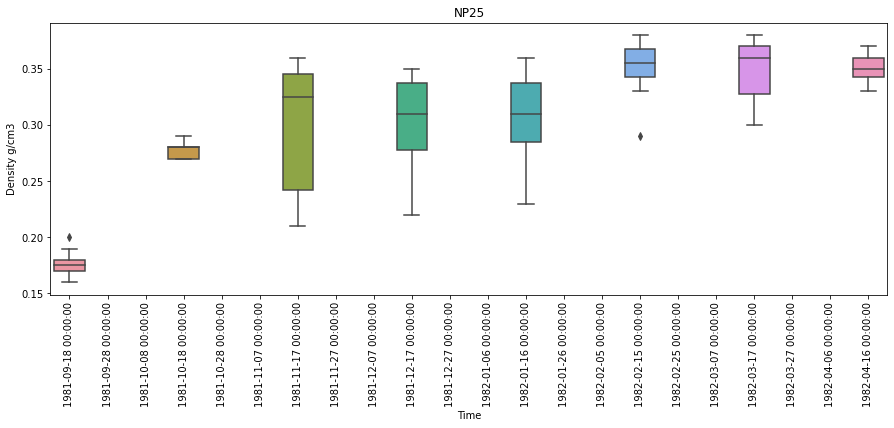

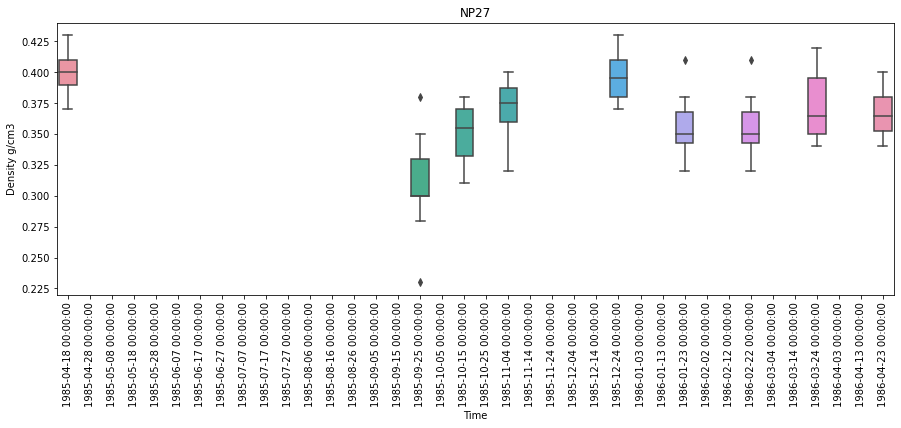

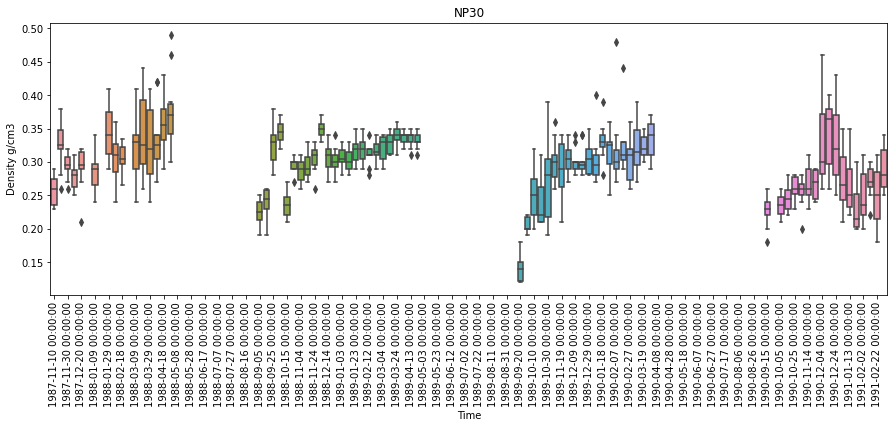

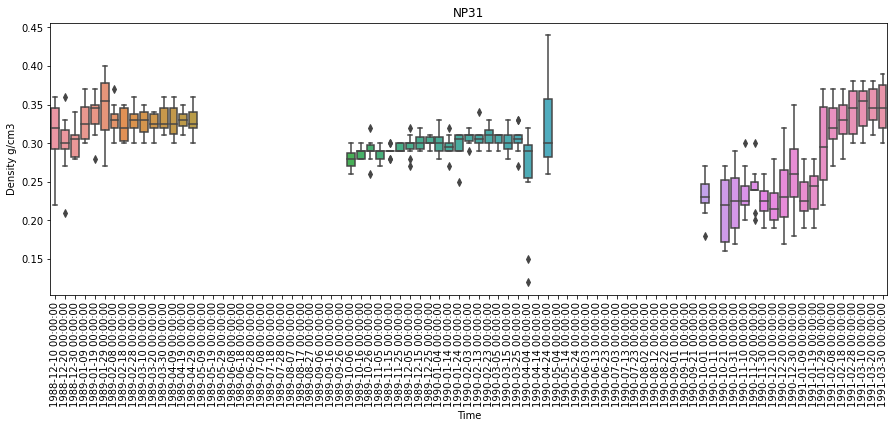

In [99]:
sheet_names = (['5', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '18', '19', '20', '22', '25', '27', '30', '31'])

import matplotlib.ticker as ticker

for values in sheet_names:
    fig, ax = plt.subplots(figsize=(15, 5));
    g = sns.boxplot(data=xl[values].iloc[:,0:10].T, ax=ax);
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.locator_params(axis='x', nbins=100) 
    ax.set(ylabel='Density g/cm3', xlabel='Time', title='NP' + values)
    ax.set_xticklabels(xl[values].index)

    plt.plot()

# stations that have 5 transects

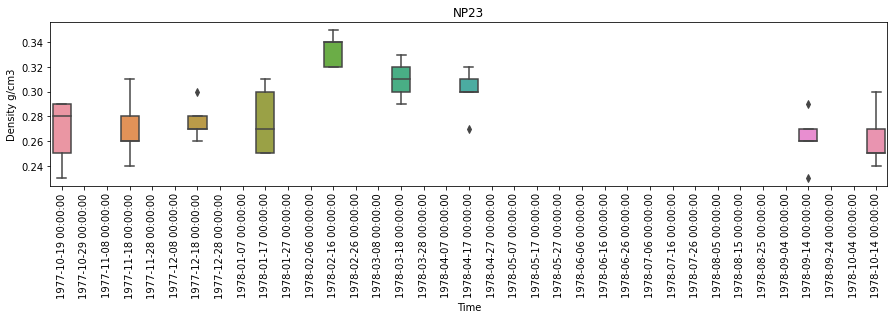

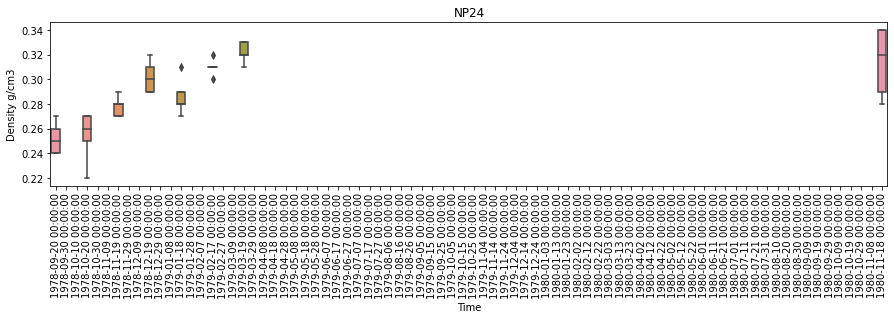

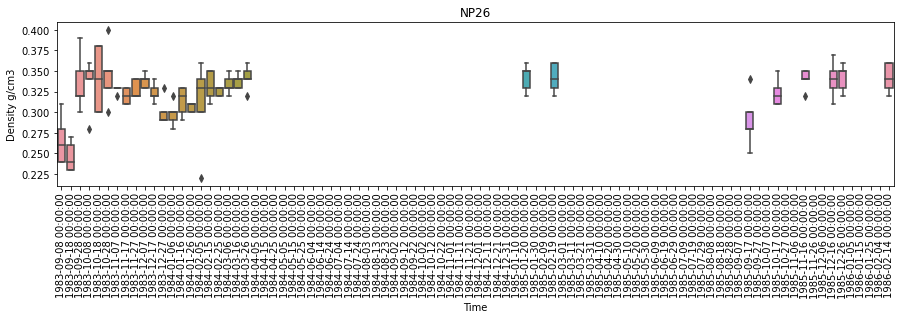

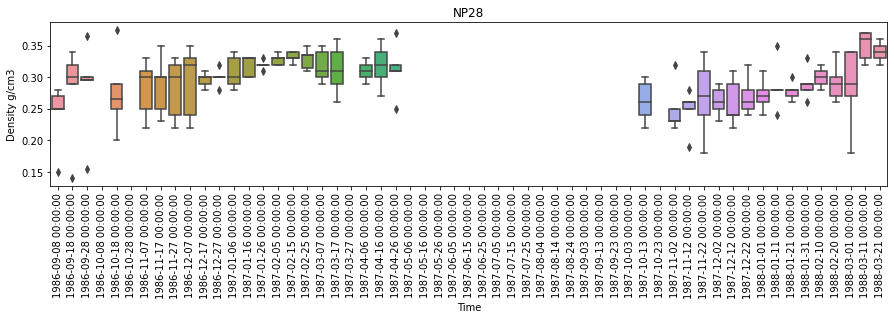

In [100]:
sheet_names2 = (['23', '24', '26', '28'])

import matplotlib.ticker as ticker

for values in sheet_names2:
    fig, ax = plt.subplots(figsize=(15,3))
    g = sns.boxplot(data=xl[values].iloc[:,0:5].T, ax=ax);
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.locator_params(axis='x', nbins=100) 
    ax.set(ylabel='Density g/cm3', xlabel='Time', title='NP' + values)
    ax.set_xticklabels(xl[values].index)
    
    plt.plot()
    

# Depth dictionary

In [11]:
fn = r'C:\Users\Default\Documents\transect_depths.xlsx'
xl2 = pd.read_excel(fn, engine='openpyxl', sheet_name=None, parse_dates=True, index_col=0)
xl2.keys()

#for values in xl2.keys():
#    print(xl2[values])

dict_keys(['5', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '18', '19', '20', '22', '23', '24', '25', '26', '27', '29', '30', '31'])

In [12]:
for values in xl2.keys():
    
    xl2[values].loc['avg'] = xl2[values].mean()
    xl2[values].loc['std'] = xl2[values].std()

    xl2[values] = xl2[values].T
    xl2[values] = xl2[values].resample('10D').mean()

    xl2[values].reset_index(inplace=True)
    xl2[values]['day'] = xl2[values]['index'].dt.day
    xl2[values]['month'] = xl2[values]['index'].dt.month
    xl2[values]['year'] = xl2[values]['index'].dt.year

    xl2[values] = xl2[values].sort_values(by="index")
    xl2[values].set_index('index', inplace=True)
    
    xl2[values] = xl2[values].resample('10D').mean()

    #print(xl[values]);

<AxesSubplot:label='f9937b85-09e9-44f4-91f6-c672276e87ee'>

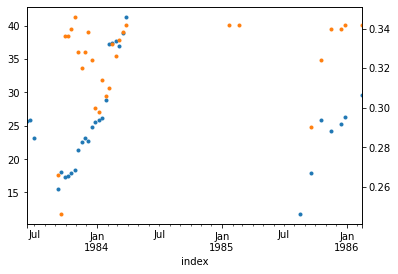

In [13]:
xl2['26'].avg.plot(style='.')
xl['26'].avg.plot(style='.', secondary_y=True)

# depth differnces

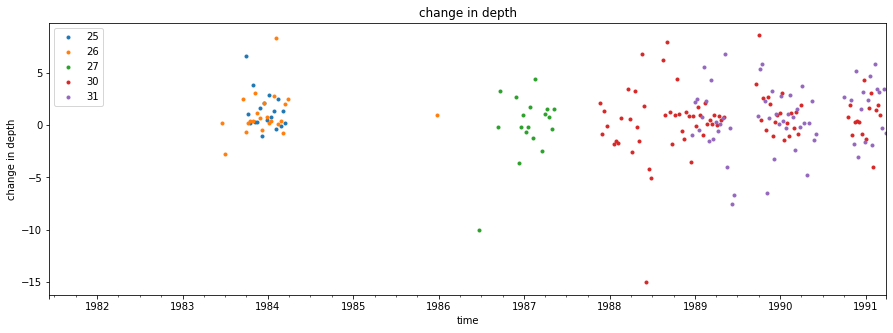

In [14]:
i2 = (['25', '26', '27', '30', '31'])
for values in i2:
    xl2[values].avg.diff().plot(figsize=(15,5),style='.')
    plt.title('change in depth')
    plt.xlabel('time')
    plt.ylabel('change in depth')
    plt.legend(i2)

# change in depth and density

In [15]:
len(xl2['25'].avg.diff())

102

In [16]:
len(xl['25'].avg.diff())

22

# dataframes

In [51]:
df = pd.DataFrame({'stdv_density':xl['31'].stdv, 'density_diff':xl['31'].avg.diff(), 'depth_diff':xl2['31'].avg.diff()}, index=None, columns=None)

#df = df.resample('10D').sum()

cols = ['density_diff']
df[cols] = df[df[cols] != 0][cols]
df.dropna()

df.dropna(inplace=True)
df

,stdv_density,density_diff,depth_diff
index,,,
1988-12-20,0.037537,-6.999998e-03,-0.960784
1988-12-30,0.018868,2.999996e-03,2.215686
1989-01-09,0.024269,2.700000e-02,2.470588
1989-01-19,0.025318,7.999995e-03,-0.470588
1989-01-29,0.042237,7.000002e-03,0.784314
1989-02-08,0.020224,-1.500000e-02,5.529412
1989-02-18,0.020025,-6.000003e-03,2.313725
1989-02-28,0.017000,6.000003e-03,-1.509804
1989-03-10,0.017776,-9.999990e-04,4.313725


In [52]:
df2 = pd.DataFrame({'stdv_density':xl['30'].stdv, 'density_diff':xl['30'].avg.diff(), 'depth_diff':xl2['30'].avg.diff()}, index=None, columns=None)

#df2 = df2.resample('10D').sum()

cols = ['density_diff']
df2[cols] = df2[df2[cols] != 0][cols]
df2.dropna()

df2.dropna(inplace=True)
df2

,stdv_density,density_diff,depth_diff
index,,,
1987-11-20,0.034943,0.069,2.058824
1987-11-30,0.018574,-0.032,-0.823529
1987-12-10,0.017776,-0.017,1.352941
1987-12-20,0.031129,0.013,-0.078431
1988-01-29,0.039812,0.059,-1.490196
...,...,...,...
1991-01-23,0.034482,-0.036,3.019608
1991-02-02,0.037630,0.017,-4.019608
1991-02-12,0.023580,0.024,1.411765


In [53]:
df3 = pd.DataFrame({'stdv_density':xl['27'].stdv, 'density_diff':xl['27'].avg.diff(), 'depth_diff':xl2['27'].avg.diff()}, index=None, columns=None)

#df3 = df3.resample('10D').sum()

cols = ['density_diff']
df3[cols] = df3[df3[cols] != 0][cols]
df3.dropna()

df3.dropna(inplace=True)
df3

,stdv_density,density_diff,depth_diff
index,,,


In [54]:
df4 = pd.DataFrame({'stdv_density':xl['26'].stdv, 'density_diff':xl['26'].avg.diff(), 'depth_diff':xl2['26'].avg.diff()}, index=None, columns=None)

#df4 = df4.resample('10D').sum()

cols = ['density_diff']
df4[cols] = df4[df4[cols] != 0][cols]
df4.dropna()

df4.dropna(inplace=True)
df4

,stdv_density,density_diff,depth_diff
index,,,
1983-09-18,0.016248,-2.000000e-02,2.450980
1983-09-28,0.031369,8.999999e-02,-0.666667
1983-10-08,0.028705,5.960464e-09,0.176471
1983-10-18,0.035777,4.000002e-03,0.372549
1983-10-28,0.032619,6.000000e-03,0.411765
1983-11-07,0.004000,-1.799999e-02,3.058824
1983-11-17,0.008944,-8.000004e-03,1.137255
1983-11-27,0.009798,7.999992e-03,0.627451
1983-12-07,0.007483,1.000001e-02,-0.450980


<AxesSubplot:label='90bd2bea-7da3-4713-9fc7-e519135895d1'>

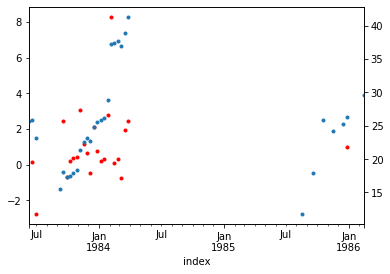

In [41]:
xl2['26'].avg.diff().plot(style = '.', color='red')
xl2['26'].avg.plot(style = '.', secondary_y=True)

In [55]:
df5 = pd.DataFrame({'stdv_density':xl['25'].stdv, 'density_diff':xl['25'].avg.diff(), 'depth_diff':xl2['25'].avg.diff()}, index=None, columns=None)

#df5 = df5.resample('10D').sum()

cols = ['density_diff']
df5[cols] = df5[df5[cols] != 0][cols]
df5.dropna()

df5.dropna(inplace=True)
df5

,stdv_density,density_diff,depth_diff
index,,,


In [56]:
import scipy as sp
from scipy import stats

X = list(df.depth_diff) + list(df2.depth_diff) + list(df3.depth_diff) + list(df4.depth_diff) + list(df5.depth_diff)
Y = list(df.density_diff) + list(df2.density_diff) + list(df3.density_diff) + list(df4.density_diff) + list(df5.density_diff)

res = sp.stats.linregress(X, Y)
res

LinregressResult(slope=-0.003686778755852836, intercept=0.005351914199188837, rvalue=-0.2519466460739892, pvalue=0.0024011722676006288, stderr=0.0011925816875788277)

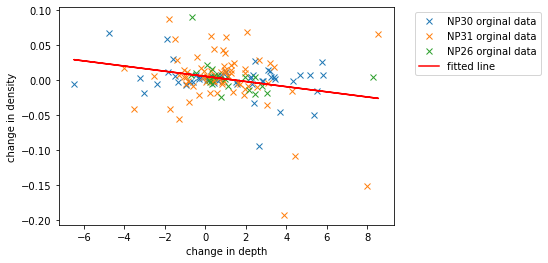

In [57]:
plt.plot(df.depth_diff, df.density_diff, 'x', label='NP30 orginal data')
plt.plot(df2.depth_diff, df2.density_diff, 'x', label='NP31 orginal data')
#plt.plot(df3.depth_diff, df3.density_diff, 'x', label='NP27 orginal data')
plt.plot(df4.depth_diff, df4.density_diff, 'x', label='NP26 orginal data')
#plt.plot(df5.depth_diff, df5.density_diff, 'x', label='NP25 orginal data')

Z = []
for point in X:
    Z.append(res.intercept + res.slope*point)
    
plt.plot(X, Z, 'r', label='fitted line')

plt.xlabel('change in depth')
plt.ylabel('change in density')

plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')